In [1]:
%matplotlib inline
%time from hikyuu import *

std::cout are redirected to python::stdout
std::cerr are redirected to python::stderr
2020-07-16 22:34:59.432 [HKU-I] - Loading market information... [hku::BaseInfoDriver::loadBaseInfo]
2020-07-16 22:34:59.436 [HKU-I] - Loading stock type information... [hku::BaseInfoDriver::loadBaseInfo]
2020-07-16 22:34:59.437 [HKU-I] - Loading stock information... [hku::BaseInfoDriver::loadBaseInfo]
2020-07-16 22:35:01.743 [HKU-I] - Loading KData... [hku::StockManager::init]
2020-07-16 22:35:01.753 [HKU-I] - Preloading all day kdata to buffer! [hku::StockManager::setKDataDriver]
2020-07-16 22:35:14.534 [HKU-I] - 12.79s Loaded Data. [hku::StockManager::init]
Wall time: 16 s


# 绘制组合窗口

使用 create_figure 函数快速创建查看证券K线信息的常见组合窗口
  

In [2]:
help(create_figure)

Help on function create_figure in module hikyuu.draw.drawplot:

create_figure(n=1, figsize=None)
    生成含有指定坐标轴数量的窗口，最大只支持4个坐标轴。
    
    :param int n: 坐标轴数量
    :param figsize: (宽, 高)
    :return: (ax1, ax2, ...) 根据指定的坐标轴数量而定，超出[1,4]个坐标轴时，返回None



(<matplotlib.axes._axes.Axes at 0x1b6fff255c8>,
 <matplotlib.axes._axes.Axes at 0x1b6fffc88c8>)

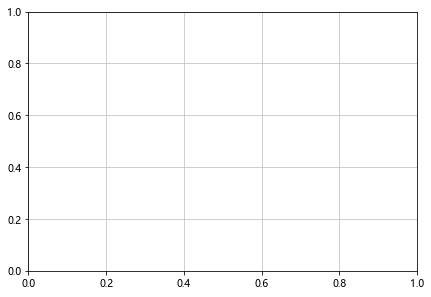

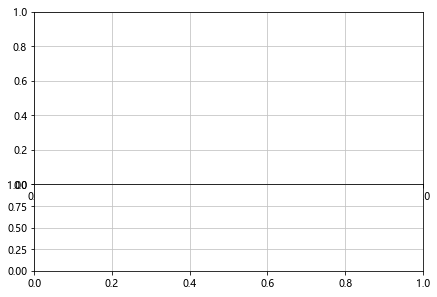

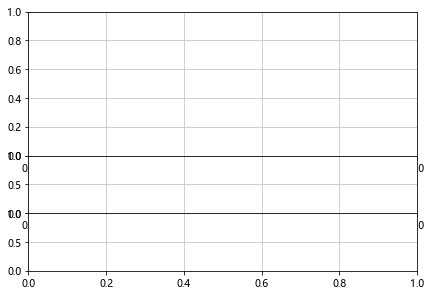

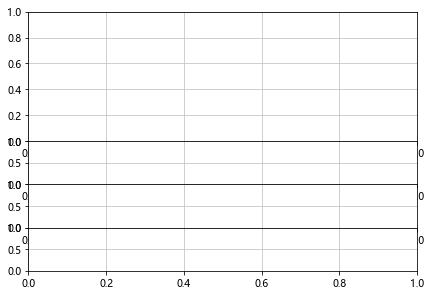

In [3]:
#不同坐标轴数量，其显示窗口布局
create_figure(figsize=(6,4))
create_figure(2, figsize=(6,4))
create_figure(3, figsize=(6,4))
create_figure(4, figsize=(6,4))

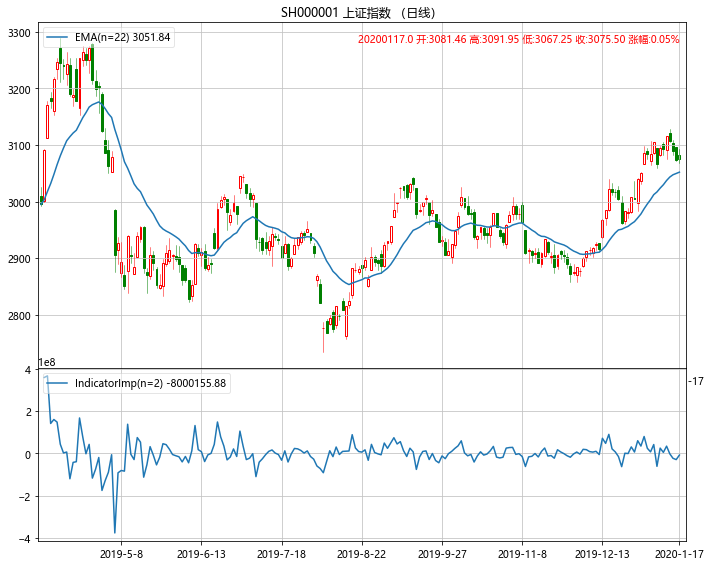

In [4]:
s = sm['sh000001']
k = s.get_kdata(Query(-200))

#创建两个显示坐标轴的窗口
ax1,ax2 = create_figure(2)

#在第一个坐标轴中绘制K线和EMA
k.plot(axes=ax1)
ma = EMA(CLOSE(k))
ma.plot(axes=ax1, legend_on=True)

#在第二个坐标轴中绘制艾尔德力度指标
v = VIGOR(k)
v.plot(axes=ax2, legend_on=True)

# 绘制MACD

绘制MACD：
- ax_draw_macd
- ax_draw_macd2

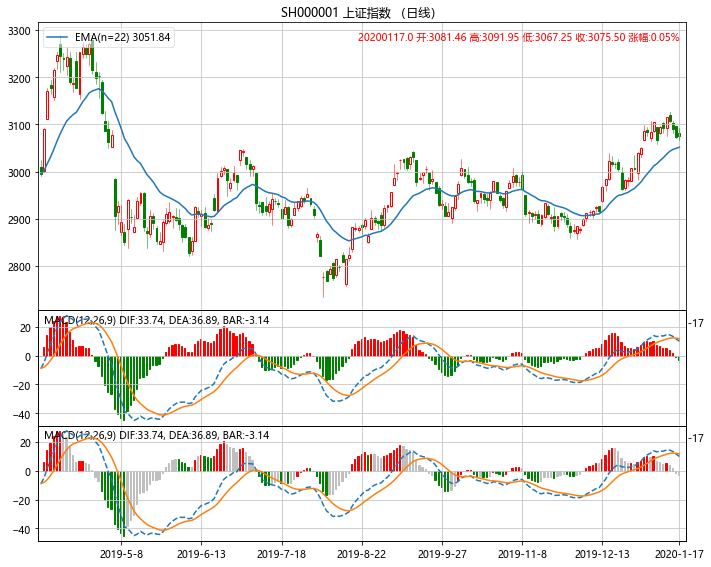

In [5]:
ax1,ax2, ax3 = create_figure(3)

k.plot(axes=ax1)
ma.plot(axes=ax1, legend_on=True)

ax_draw_macd(axes=ax2, kdata=k)
ax_draw_macd2(axes=ax3, ref=ma, kdata=k)

# 内建的三个较复杂示例

- el.draw 绘制亚历山大.艾尔德交易系统图形
- kf.draw 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- kf.draw2 绘制佩里.J.考夫曼（Perry J.Kaufman） 自适应移动平均系统(AMA)
- vl.draw 绘制普通K线图 + 成交量（成交金额）
- vl.draw2 绘制普通K线图 + 成交量（成交金额）+ MACD


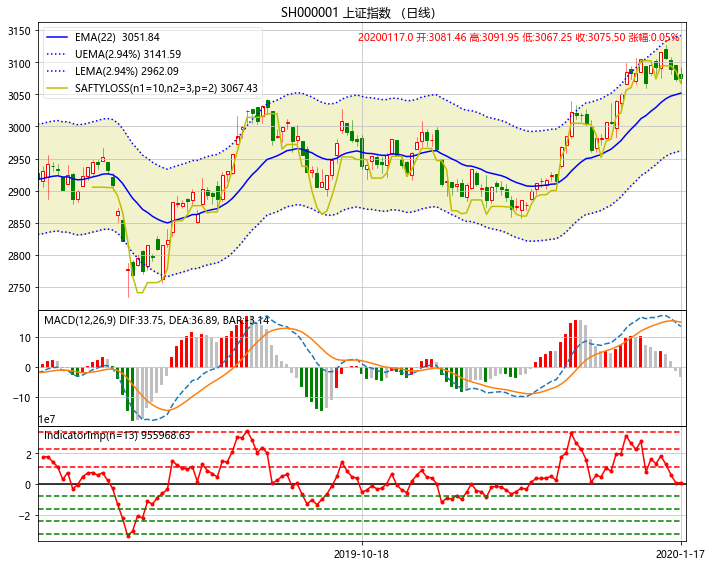

In [6]:
el.draw(s)

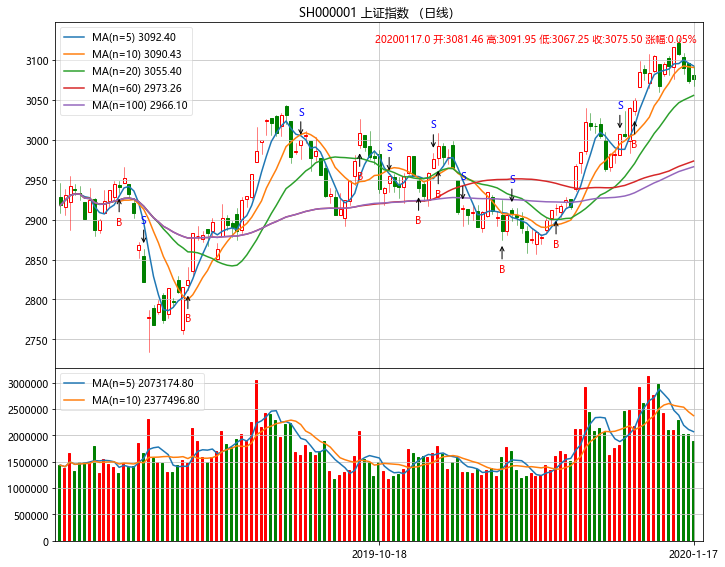

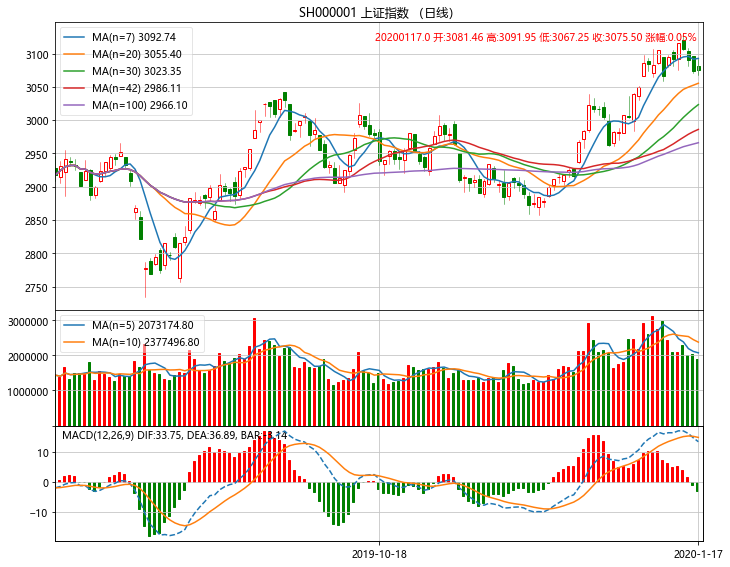

In [7]:
vl.draw(s)
vl.draw2(s)

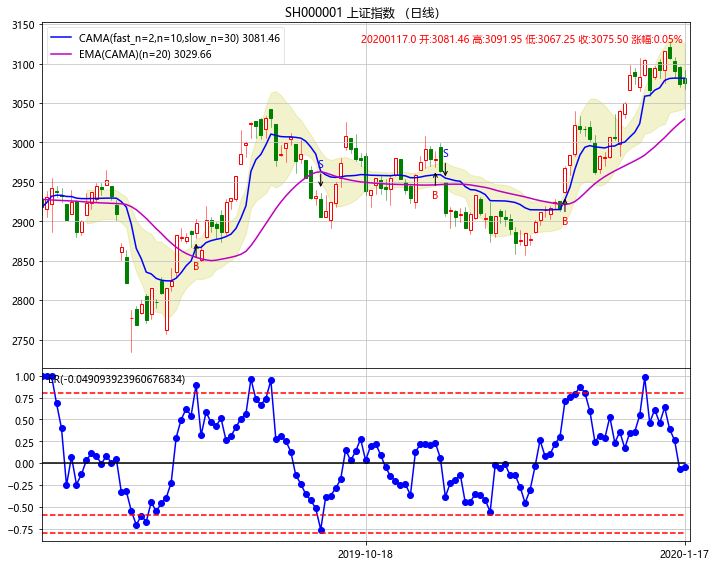

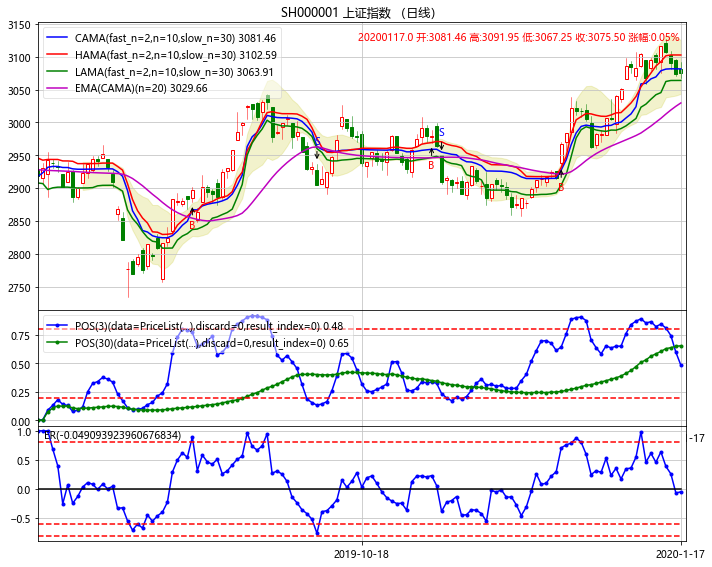

In [8]:
kf.draw(s)
kf.draw2(blocka)